## WORK IN PROGRESS ##

Exploratory analysis of MBTA's subway system + time series models predicting ridership and possibly a reliability analysis and comparison

In [1]:
### Datasets downloaded from MBTA's official website at: 

# https://mbta-massdot.opendata.arcgis.com/datasets/mbta-average-monthly-ridership-by-mode
# https://mbta-massdot.opendata.arcgis.com/datasets/mbta-ridership-by-season-route-line-stop-and-time-period?selectedAttribute=average_ridership

In [25]:
### Imports
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [4]:
ridership_df = pd.read_csv('./datasets/MBTA_ridership_by_mode.csv')

In [5]:
ridership_df.head()

,service_date,mode,route_or_line,total_monthly_ridership,countofdates,average_monthly_ridership,ObjectId
0,2017-04-01T04:00:00.000Z,Bus,Bus,6911721,20,345586.1,1
1,2017-04-01T04:00:00.000Z,Bus,Silver Line,681787,20,34089.4,2
2,2017-04-01T04:00:00.000Z,Commuter Rail,Commuter Rail,2438211,20,121910.6,3
3,2017-04-01T04:00:00.000Z,Ferry,Boat-F1,61364,20,3068.2,4
4,2017-04-01T04:00:00.000Z,Ferry,Boat-F4,38199,20,1910.0,5


In [6]:
ridership_df.tail()

,service_date,mode,route_or_line,total_monthly_ridership,countofdates,average_monthly_ridership,ObjectId
447,2019-09-01T04:00:00.000Z,Rail,Blue Line,1528456,20,76422.8,448
448,2019-09-01T04:00:00.000Z,Rail,Green Line,3179038,20,158951.9,449
449,2019-09-01T04:00:00.000Z,Rail,Orange Line,4311143,20,215557.2,450
450,2019-09-01T04:00:00.000Z,Rail,Red Line,4915753,20,245787.7,451
451,2019-09-01T04:00:00.000Z,The RIDE,The RIDE,121197,20,6059.9,452


In [7]:
ridership_df['route_or_line'].unique()

array(['Bus', 'Silver Line', 'Commuter Rail', 'Boat-F1', 'Boat-F4',
       'Blue Line', 'Green Line', 'Orange Line', 'Red Line', 'The RIDE'],
      dtype=object)

In [8]:
# number of entries that contain data on MBTA's subway
(ridership_df.loc[ridership_df['route_or_line'].isin(['Blue Line','Red Line', 'Silver Line', 'Green Line', 'Orange Line'])]).shape

(225, 7)

In [9]:
sub_df = ridership_df.loc[ridership_df['route_or_line'].isin(['Blue Line','Red Line', 'Silver Line', 'Green Line', 'Orange Line'])]

In [115]:
sub_df.head(10)

,index,service_date,mode,route_or_line,total_monthly_ridership,countofdates,average_monthly_ridership,ObjectId,first_diff_avg_ridership,second_diff_avg_ridership
0,158,2016-01-01T05:00:00.000Z,Rail,Red Line,4738658,19,249403.1,159,NaN,NaN
1,151,2016-01-01T05:00:00.000Z,Bus,Silver Line,669761,19,35250.6,152,-214152.5,NaN
2,155,2016-01-01T05:00:00.000Z,Rail,Blue Line,1142850,19,60150.0,156,24899.4,239051.9
3,156,2016-01-01T05:00:00.000Z,Rail,Green Line,3366005,19,177158.2,157,117008.2,92108.8
4,157,2016-01-01T05:00:00.000Z,Rail,Orange Line,4110859,19,216361.0,158,39202.8,-77805.4
5,161,2016-02-01T05:00:00.000Z,Bus,Silver Line,730265,20,36513.3,162,-179847.7,-219050.5
6,165,2016-02-01T05:00:00.000Z,Rail,Blue Line,1220639,20,61032.0,166,24518.7,204366.4
7,167,2016-02-01T05:00:00.000Z,Rail,Orange Line,4379649,20,218982.5,168,157950.5,133431.8
8,168,2016-02-01T05:00:00.000Z,Rail,Red Line,5132032,20,256601.6,169,37619.1,-120331.4
9,166,2016-02-01T05:00:00.000Z,Rail,Green Line,3752289,20,187614.4,167,-68987.2,-106606.3


In [11]:
# reordering values by date
sub_df = sub_df.sort_values('service_date')
sub_df = sub_df.reset_index()

In [13]:
# number of entries per subway line
sub_df['route_or_line'].value_counts()

Red Line       45
Green Line     45
Orange Line    45
Blue Line      45
Silver Line    45
Name: route_or_line, dtype: int64

In [108]:
# ploting function containing buttons that allow to toggle between lines, for added clarity
def time_plot(col, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x = sub_df.service_date.loc[sub_df['route_or_line'] == 'Red Line'],
        y = sub_df[col].loc[sub_df['route_or_line'] == 'Red Line'],
        name = 'Red Line',
        line_color = 'red',
        opacity = 0.8))

    fig.add_trace(go.Scatter(
        x = sub_df.service_date.loc[sub_df['route_or_line'] == 'Blue Line'],
        y = sub_df[col].loc[sub_df['route_or_line'] == 'Blue Line'],
        name = 'Blue Line',
        line_color = 'navy',
        opacity = 0.8))

    fig.add_trace(go.Scatter(
        x = sub_df.service_date.loc[sub_df['route_or_line'] == 'Orange Line'],
        y = sub_df[col].loc[sub_df['route_or_line'] == 'Orange Line'],
        name = 'Orange Line',
        line_color = 'orange',
        opacity = 0.8))

    fig.add_trace(go.Scatter(
        x = sub_df.service_date.loc[sub_df['route_or_line'] == 'Silver Line'],
        y = sub_df[col].loc[sub_df['route_or_line'] == 'Silver Line'],
        name = 'Silver Line',
        line_color = 'gray',
        opacity = 0.8))

    fig.add_trace(go.Scatter(
        x = sub_df.service_date.loc[sub_df['route_or_line'] == 'Green Line'],
        y = sub_df[col].loc[sub_df['route_or_line'] == 'Green Line'],
        name = 'Green Line',
        line_color = 'green',
        opacity = 0.8))
    
    
    fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            type="buttons",
            direction="right",
            active=0,
            x=0.7,
            y=-0.2,
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True]},
                           {"title": title}]),
                dict(label="Red",
                     method="update",
                     args=[{"visible": [True, False, False, False, False]},
                           {"title": "Red Line"}]),
                dict(label="Blue",
                     method="update",
                     args=[{"visible": [False, True, False, False, False]},
                           {"title": "Blue Line"}]),
                dict(label="Orange",
                     method="update",
                     args=[{"visible": [False, False, True, False, False]},
                           {"title": "Orange Line"}]),
                dict(label="Silver",
                     method="update",
                     args=[{"visible": [False, False, False, True, False]},
                           {"title": "Silver Line"}]),
                dict(label="Green",
                     method="update",
                     args=[{"visible": [False, False, False, False, True]},
                           {"title": "Green Line"}]),
            ]),
        )
    ])
    
    


    fig.update_layout(xaxis_range = ['2016-01-01','2019-09-01'],
                      title_text = title)
    fig.show()

In [109]:
time_plot('total_monthly_ridership', 'MBTA Subway Total Ridership per Line (Jan 2016 - Sep 2019)')

In [113]:
time_plot('average_monthly_ridership', 'MBTA Subway Average Ridership per Line (Jan 2016 - Sep 2019)')

In [34]:
# non stationary time series, changes not constant over time
# differenceing the data allows to get stationary time series out of non starionary series.
sub_df['first_diff_avg_ridership'] = sub_df['average_monthly_ridership'].diff(1)
sub_df['second_diff_avg_ridership'] = sub_df['average_monthly_ridership'].diff(1).diff(1)

In [ ]:
red_df

,index,service_date,mode,route_or_line,total_monthly_ridership,countofdates,average_monthly_ridership,ObjectId,first_diff_avg_ridership,second_diff_avg_ridership
0,158,2016-01-01T05:00:00.000Z,Rail,Red Line,4738658,19,249403.1,159,NaN,NaN
1,151,2016-01-01T05:00:00.000Z,Bus,Silver Line,669761,19,35250.6,152,-214152.5,NaN
2,155,2016-01-01T05:00:00.000Z,Rail,Blue Line,1142850,19,60150.0,156,24899.4,239051.9
3,156,2016-01-01T05:00:00.000Z,Rail,Green Line,3366005,19,177158.2,157,117008.2,92108.8
4,157,2016-01-01T05:00:00.000Z,Rail,Orange Line,4110859,19,216361.0,158,39202.8,-77805.4
5,161,2016-02-01T05:00:00.000Z,Bus,Silver Line,730265,20,36513.3,162,-179847.7,-219050.5
6,165,2016-02-01T05:00:00.000Z,Rail,Blue Line,1220639,20,61032.0,166,24518.7,204366.4
7,167,2016-02-01T05:00:00.000Z,Rail,Orange Line,4379649,20,218982.5,168,157950.5,133431.8
8,168,2016-02-01T05:00:00.000Z,Rail,Red Line,5132032,20,256601.6,169,37619.1,-120331.4
9,166,2016-02-01T05:00:00.000Z,Rail,Green Line,3752289,20,187614.4,167,-68987.2,-106606.3


In [112]:
time_plot('first_diff_avg_ridership', 'First Order Differenced MBTA Subway Average Ridership per Line (Jan 2016 - Sep 2019)')

In [111]:
time_plot('second_diff_avg_ridership', 'Second Order Differenced MBTA Subway Average Ridership per Line (Jan 2016 - Sep 2019)')

In [27]:
def plot(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):

    plt.figure(figsize=(18,9))

    # Iterate through each column name.
    for col in cols:

        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])

    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)

    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

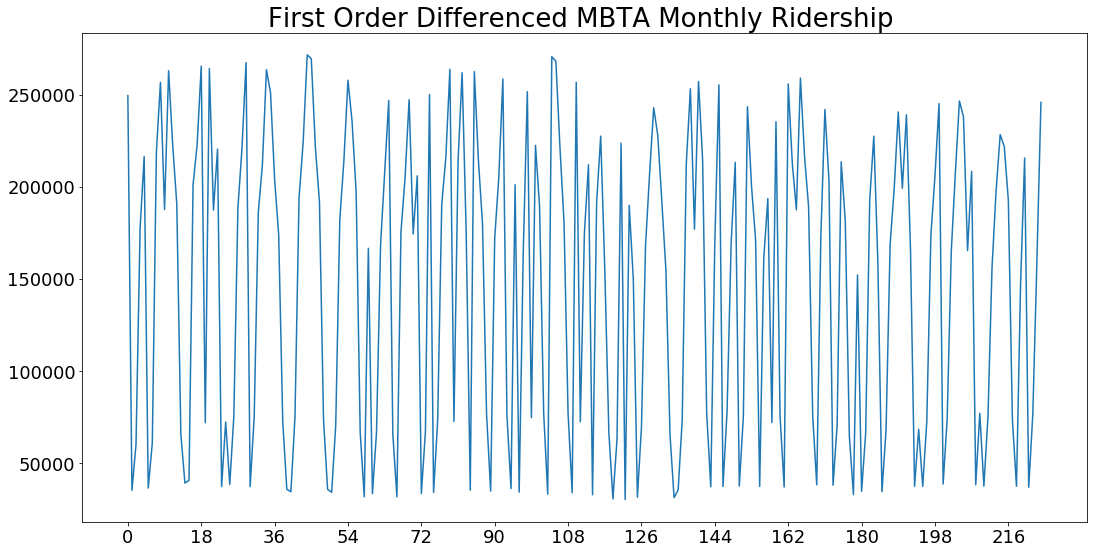

In [39]:
plot(sub_df, ['average_monthly_ridership'], title = "First Order Differenced MBTA Monthly Ridership ", steps=18)

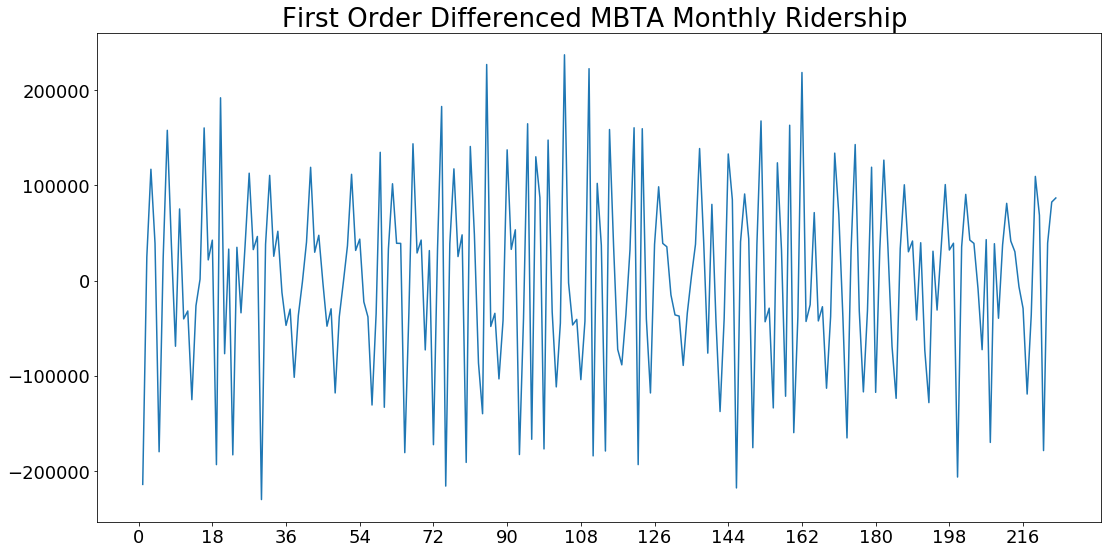

In [29]:
plot(sub_df, ['first_diff_avg_ridership'], title = "First Order Differenced MBTA Monthly Ridership ", steps=18)

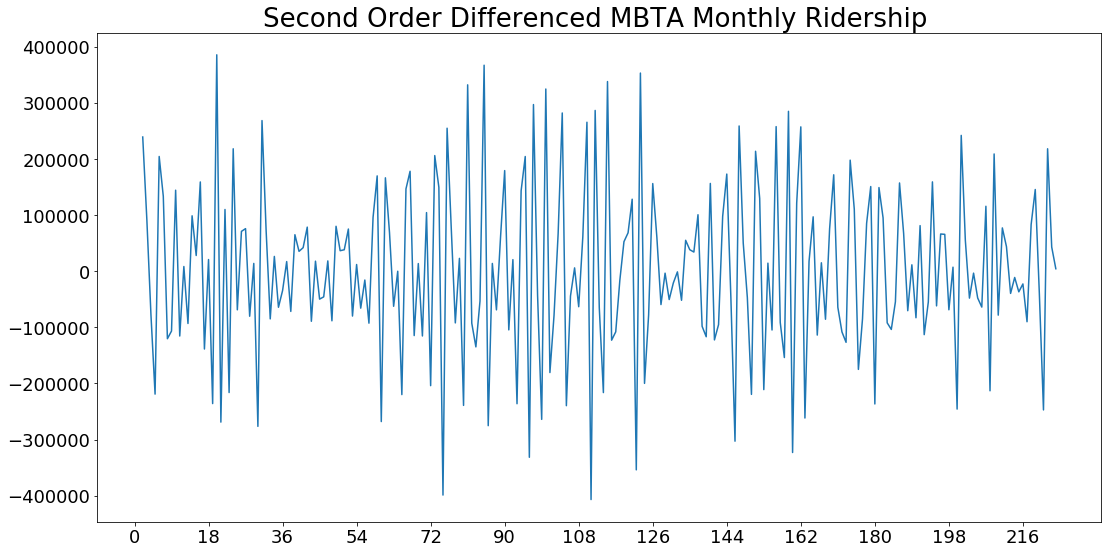

In [35]:
plot(sub_df, ['second_diff_avg_ridership'], title = "Second Order Differenced MBTA Monthly Ridership ", steps=18)

In [16]:
season_df = pd.read_csv('./datasets/MBTA_Ridership_by_Season_RouteLine_Stop_and_Time_Period.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (2,3,10) have mixed types. Specify dtype option on import or set low_memory=False.



In [17]:
season_df

,mode,season,route_id,route_name,direction_id,day_type_id,day_type_name,time_period_id,time_period_name,stop_name,stop_id,total_ridership,number_service_days,average_ridership,bus_route_variant,ObjectId
0,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,WASHINGTON ST OPP RUGGLES ST,1,NaN,NaN,0.4,1-_-0,1
1,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,WASHINGTON ST @ MELNEA CASS B,2,NaN,NaN,0.7,1-_-0,2
2,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MELNEA CASS BLVD @ HARRISON A,6,NaN,NaN,0.2,1-_-0,3
3,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MASSACHUSETTS AVE @ ALBANY ST,57,NaN,NaN,10.3,1-_-0,4
4,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MASSACHUSETTS AVE @ HARRISON,58,NaN,NaN,8.9,1-_-0,5
5,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,DUDLEY STATION,64,NaN,NaN,75.7,1-_-0,6
6,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MASSACHUSETTS AVE @ TREMONT S,87,NaN,NaN,4.1,1-_-0,7
7,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MASSACHUSETTS AVE @ COLUMBUS,88,NaN,NaN,0.5,1-_-0,8
8,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MASSACHUSETTS AVE @ ST BOTOLP,89,NaN,NaN,4.2,1-_-0,9
9,3,Fall 2016,1,1,0,day_type_01,weekday,time_period_01,VERY_EARLY_MORNING,MASSACHUSETTS AVE @ CLEARWAY,91,NaN,NaN,2.0,1-_-0,10


In [18]:
season_df.shape

(411784, 16)

In [19]:
season_df['total_ridership'].isna().sum()

406504

In [20]:
season_df['number_service_days'].isna().sum()

406504